<a href="https://colab.research.google.com/github/msalvati1997/mushrooms_classificator/blob/main/mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrooooms : analisi della commestibilità dei funghi



Lo scopo del progetto è quello di predire se dato un fungo sconosciuto, esso sia commestibile o meno, sulla base dell'integrazione di diverse funzionalità di Machine learning offerte da librerie software.

Il dataset utilizzato è Mushrooms 2 UCI, della Philipps-University (Marburg, Germania), ed include 61069 ipotetici funghi con cappello basati su 173 specie (353 funghi per specie).
Ogni fungo è identificato come commestibile, velenoso, o di
commestibilità sconosciuta e sconsigliata (quest'ultima classe è combinata con la classe velenosa).

I funghi appartenenti al suddetto dataset sono stati ottenuti a partire da un dataset primario contenente informazioni su alcuni funghi descritti all'interno di un'enciclopedia.

Seguono gli attributi del dataset.

Feature | Meaning
------ | ------
cap-diameter (m)| float number in cm
cap-shape (n)| bell=b, conical=c, convex=x, flat=f, sunken=s,spherical=p, others=o
cap-surface (n)| fibrous=i, grooves=g, scaly=y, smooth=s,shiny=h,leathery=l, silky=k, sticky=t,wrinkled=w, fleshy=e
cap-color (n)| brown=n, buff=b, gray=g, green=r, pink=p,purple=u, red=e, white=w, yellow=y, blue=l,orange=o, black=k
does-bruise-or-bleed (n)| bruises-or-bleeding=t,no=f
gill-attachment (n)| adnate=a, adnexed=x, decurrent=d, free=e,sinuate=s, pores=p, none=f, unknown=?
gill-spacing (n)|close=c, distant=d, none=f
gill-color (n)| see cap-color + none=f
stem-height (m)| float number in cm
stem-width (m)| float number in mm
stem-root (n)| bulbous=b, swollen=s, club=c, cup=u, equal=e,rhizomorphs=z, rooted=r
stem-surface (n)| see cap-surface + none=f
stem-color (n)| see cap-color + none=f
veil-type (n)| partial=p, universal=u
veil-color (n)| see cap-color + none=f
has-ring (n)| ring=t, none=f
ring-type (n)| cobwebby=c, evanescent=e, flaring=r, grooved=g,large=l,pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
spore-print-color (n)| see cap color
habitat (n)| grasses=g, leaves=l, meadows=m, paths=p, heaths=h,urban=u,waste=w, woods=d
season (n)| spring=s, summer=u, autumn=a, winter=w




## 1 Analisi dei dati


### 1.1 Importazione delle librerie

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.metrics as mt

### 1.2 Importazione del dataset


In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/msalvati1997/mushrooms_classificator/main/secondary_data.csv") 

In [12]:
print("Dimensionalità del dataset:")
print("# Istanze :", df.shape[0])
print("# Attributi :", df.shape[1]-1)
print("Feature Target : class")

Dimensionalità del dataset:
# Istanze : 61069
# Attributi : 20
Feature Target : class



Abbiamo deciso di effettuare una conversione delle variabili categoriche in variabili numeriche ai fini di semplificarne la gestione: 

In [15]:
for col in df.columns:
  if col != 'cap-diameter' and col!='stem-height' and col!='stem-width'  :
    column_values = df[col].unique()
    count = 0 
    print(col)
    for u in column_values: 
      df[col] = df[col].replace(u,count)
      print("\t",u, "->", count)
      count += 1
    print("---------------")

class
	 p -> 0
	 e -> 1
---------------
cap-shape
	 x -> 0
	 f -> 1
	 p -> 2
	 b -> 3
	 c -> 4
	 s -> 5
	 o -> 6
---------------
cap-surface
	 g -> 0
	 h -> 1
	 nan -> 2
	 t -> 3
	 y -> 4
	 e -> 5
	 s -> 6
	 l -> 7
	 d -> 8
	 w -> 9
	 i -> 10
	 k -> 11
---------------
cap-color
	 o -> 0
	 e -> 1
	 n -> 2
	 g -> 3
	 r -> 4
	 w -> 5
	 y -> 6
	 p -> 7
	 u -> 8
	 b -> 9
	 l -> 10
	 k -> 11
---------------
does-bruise-or-bleed
	 f -> 0
	 t -> 1
---------------
gill-attachment
	 e -> 0
	 nan -> 1
	 a -> 2
	 d -> 3
	 s -> 4
	 x -> 5
	 p -> 6
	 f -> 7
---------------
gill-spacing
	 nan -> 0
	 c -> 1
	 d -> 2
	 f -> 3
---------------
gill-color
	 w -> 0
	 n -> 1
	 p -> 2
	 u -> 3
	 b -> 4
	 g -> 5
	 y -> 6
	 r -> 7
	 e -> 8
	 o -> 9
	 k -> 10
	 f -> 11
---------------
stem-root
	 s -> 0
	 nan -> 1
	 b -> 2
	 r -> 3
	 c -> 4
	 f -> 5
---------------
stem-surface
	 y -> 0
	 nan -> 1
	 s -> 2
	 k -> 3
	 i -> 4
	 h -> 5
	 t -> 6
	 g -> 7
	 f -> 8
---------------
stem-color
	 w -> 0
	 y -> 1
	 n -> 

In [17]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,0,0,0,0,0,0,0,16.95,...,0,0,0,0.0,0,0,0,0,0,0
1,0,16.60,0,0,0,0,0,0,0,17.99,...,0,0,0,0.0,0,0,0,0,0,1
2,0,14.07,0,0,0,0,0,0,0,17.80,...,0,0,0,0.0,0,0,0,0,0,0
3,0,14.17,1,1,1,0,0,0,0,15.77,...,0,0,0,0.0,0,0,1,0,0,0
4,0,14.64,0,1,0,0,0,0,0,16.53,...,0,0,0,0.0,0,0,1,0,0,0
5,0,15.34,0,0,0,0,0,0,0,17.84,...,0,0,0,0.0,0,0,1,0,0,1
6,0,14.85,1,1,0,0,0,0,0,17.71,...,0,0,0,0.0,0,0,0,0,0,0
7,0,14.86,0,1,1,0,0,0,0,17.03,...,0,0,0,0.0,0,0,1,0,0,1
8,0,12.85,1,0,0,0,0,0,0,17.27,...,0,0,0,0.0,0,0,1,0,0,2
9,0,13.55,1,0,1,0,0,0,0,16.04,...,0,0,0,0.0,0,0,1,0,0,0


### 1.3 Bilanciamento

Verifichiamo ora che il dataset sia bilanciato. Qualora non lo fosse potremmo applicare metodi di ricampionamento come oversampling e undersampling.

In [24]:
col = ['red','green']
lab = ['Poisonous','Edible']
valori = df['class'].value_counts()/df['class'].shape[0]

fig = go.Figure(data=[go.Pie(labels=lab, values=valori, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=col, line=dict(color='white', width=2)))
fig.update_layout(
    title_text="Mushrooms edibility",
    title_font_color="black",
    paper_bgcolor="white",
    plot_bgcolor='black',
    font_color="black",
)
fig.show()

Vista e considerata la similarità delle percentuali, il dataset risulta essere bilanciato

### 1.4 Correlazione

Verifichiamo a questo punto la correlazione tra i diversi attributi utilizzando la matrice di correlazione.

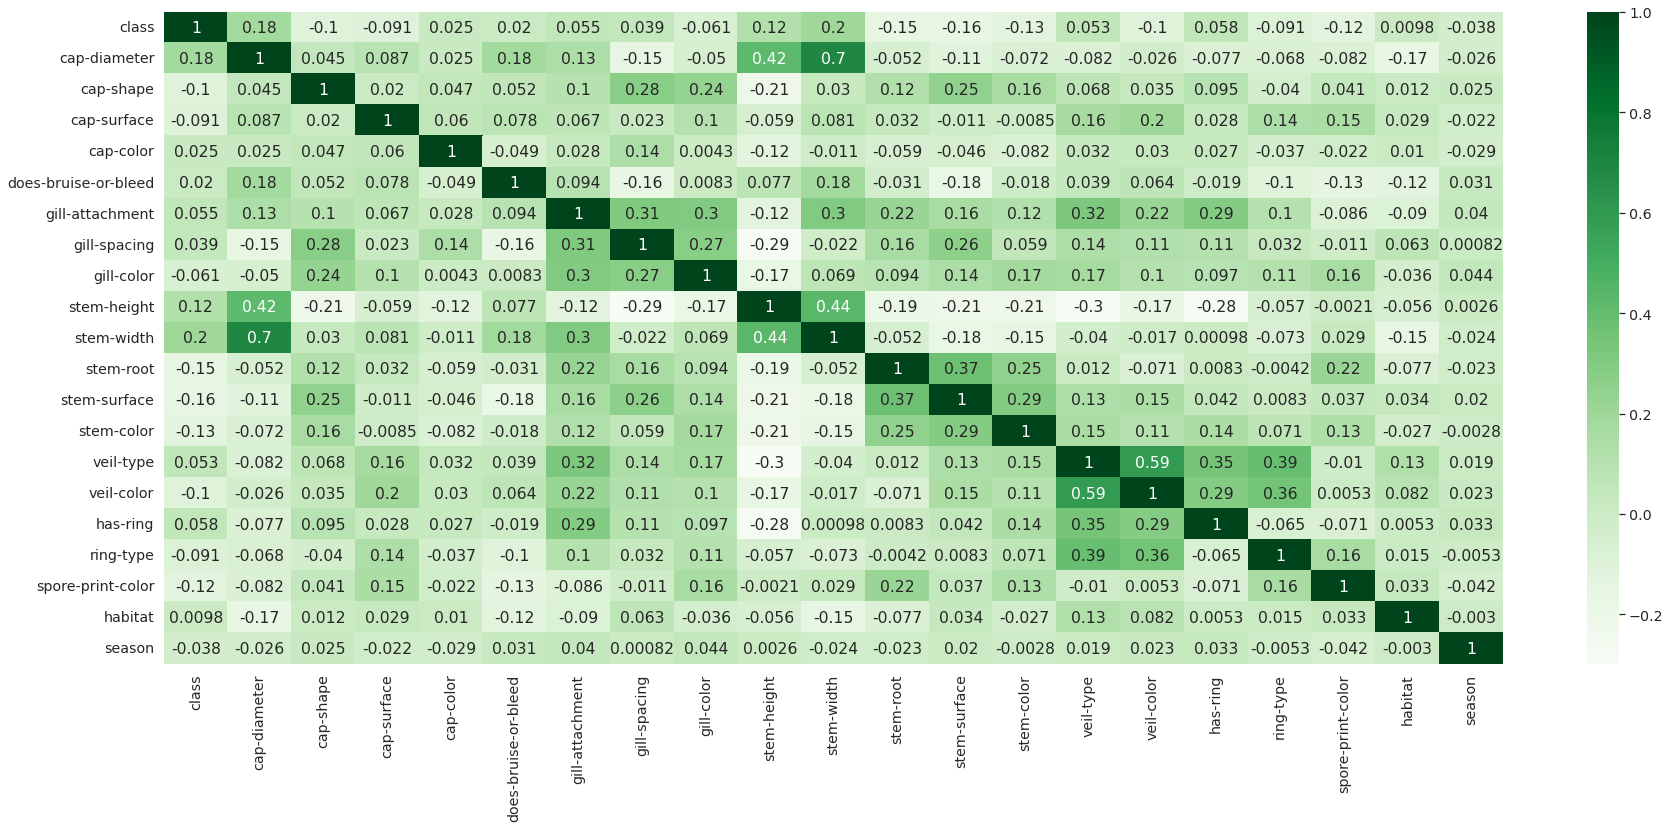

In [26]:
corr = df.corr()
sns.set(font_scale=1.30)
fig = plt.figure(figsize=(30,12))
sns.heatmap(corr,annot=True, cmap='Greens')
sns.set_palette("bright")
sns.set_style('white')
plt.show()

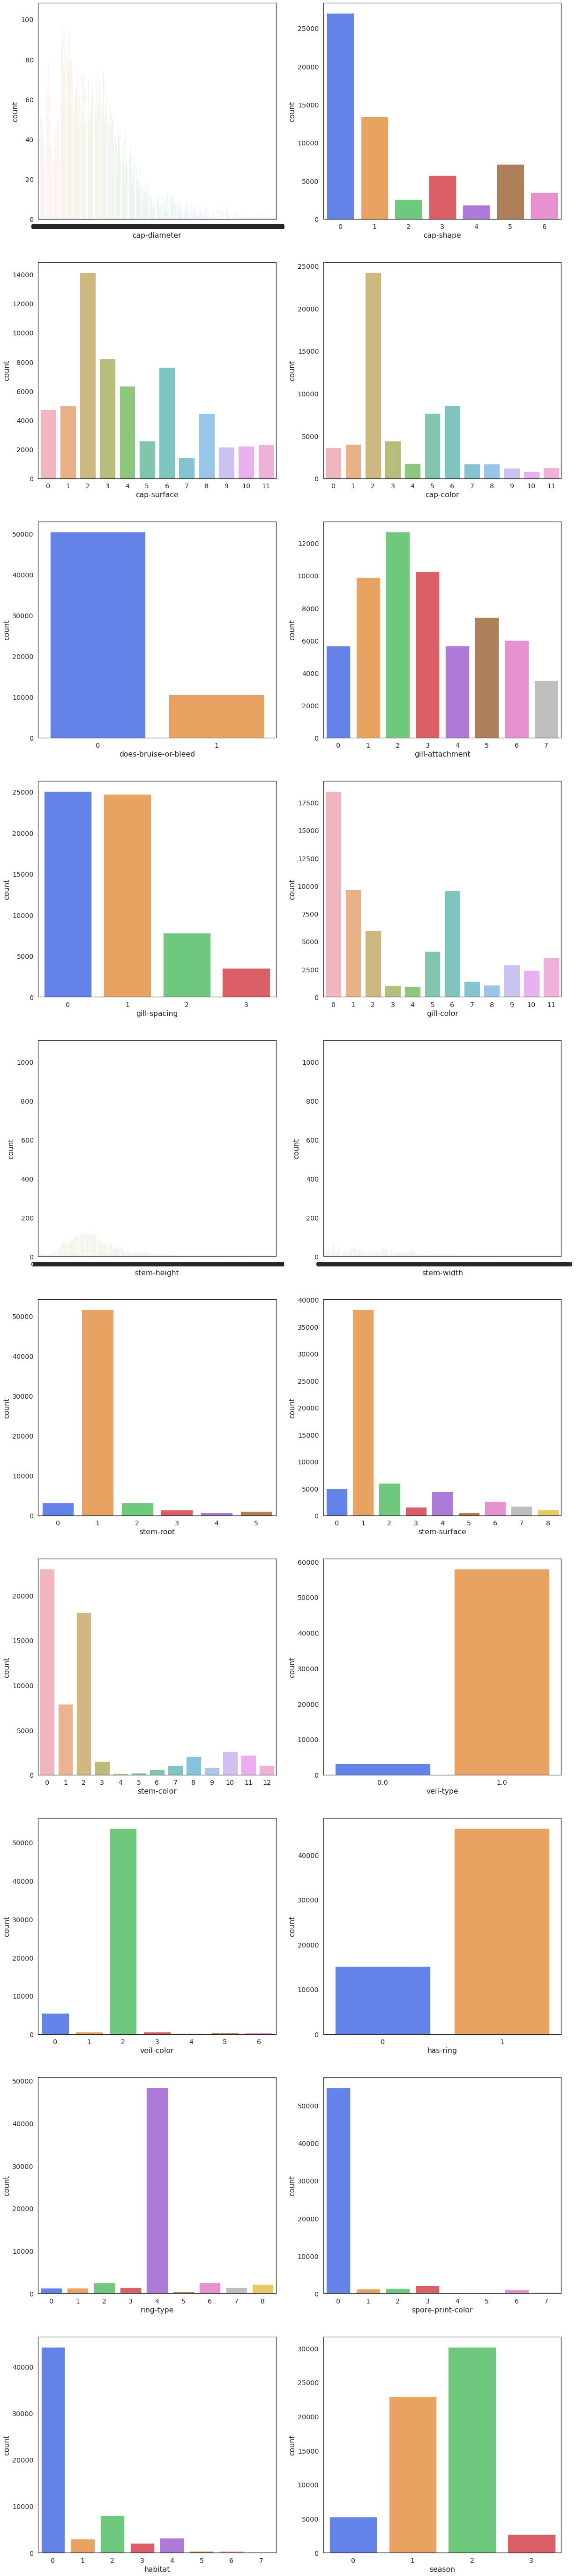

In [ ]:
categ =  ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing','gill-color','stem-height','stem-width','stem-root','stem-surface','stem-color','veil-type','veil-color','has-ring','ring-type','spore-print-color','habitat','season']
conti = ['class']

#Distribution
fig = plt.figure(figsize=(20, 100))
for i in range (0,len(categ)):
    fig.add_subplot(10,2,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

plt.show()

In [ ]:
def cond_prob(feature):
    r = df[df[feature].notnull()][feature].unique()
    p = []
    for val in r:
        joint = df[(df[feature]==val) & (df['class']=='e')].shape[0]
        pre = df[(df[feature]==val)].shape[0]
        post_1 = joint/pre
        p.append([val, post_1])
    return pd.DataFrame(p, columns=['value','prob'])

In [ ]:
#Probabilità che un fungo sia commestibile a partire dalla cap-shape
cp = cond_prob('veil-type')
cp

,value,prob
0,0.0,0.0
1,1.0,0.0


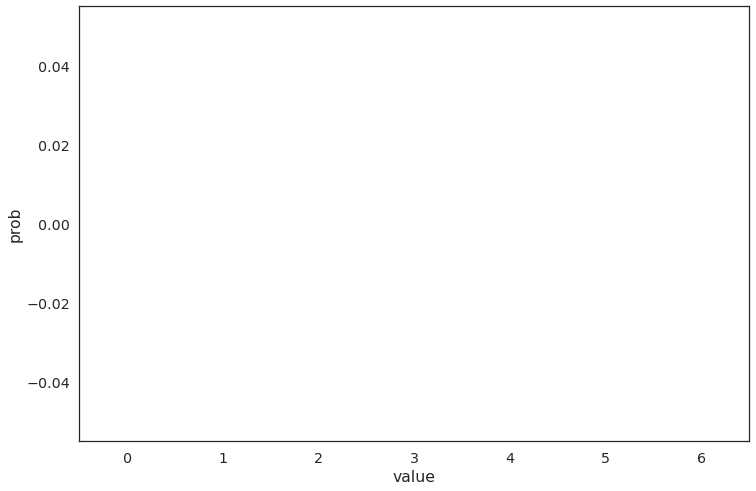

In [ ]:
#Documentazione: https://seaborn.pydata.org/generated/seaborn.barplot.html
cp = cond_prob('cap-shape')
fig = plt.figure(figsize=(12, 8))
sns.barplot(data=cp, x=cp.columns[0], y=cp.columns[1])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning:

invalid value encountered in true_divide



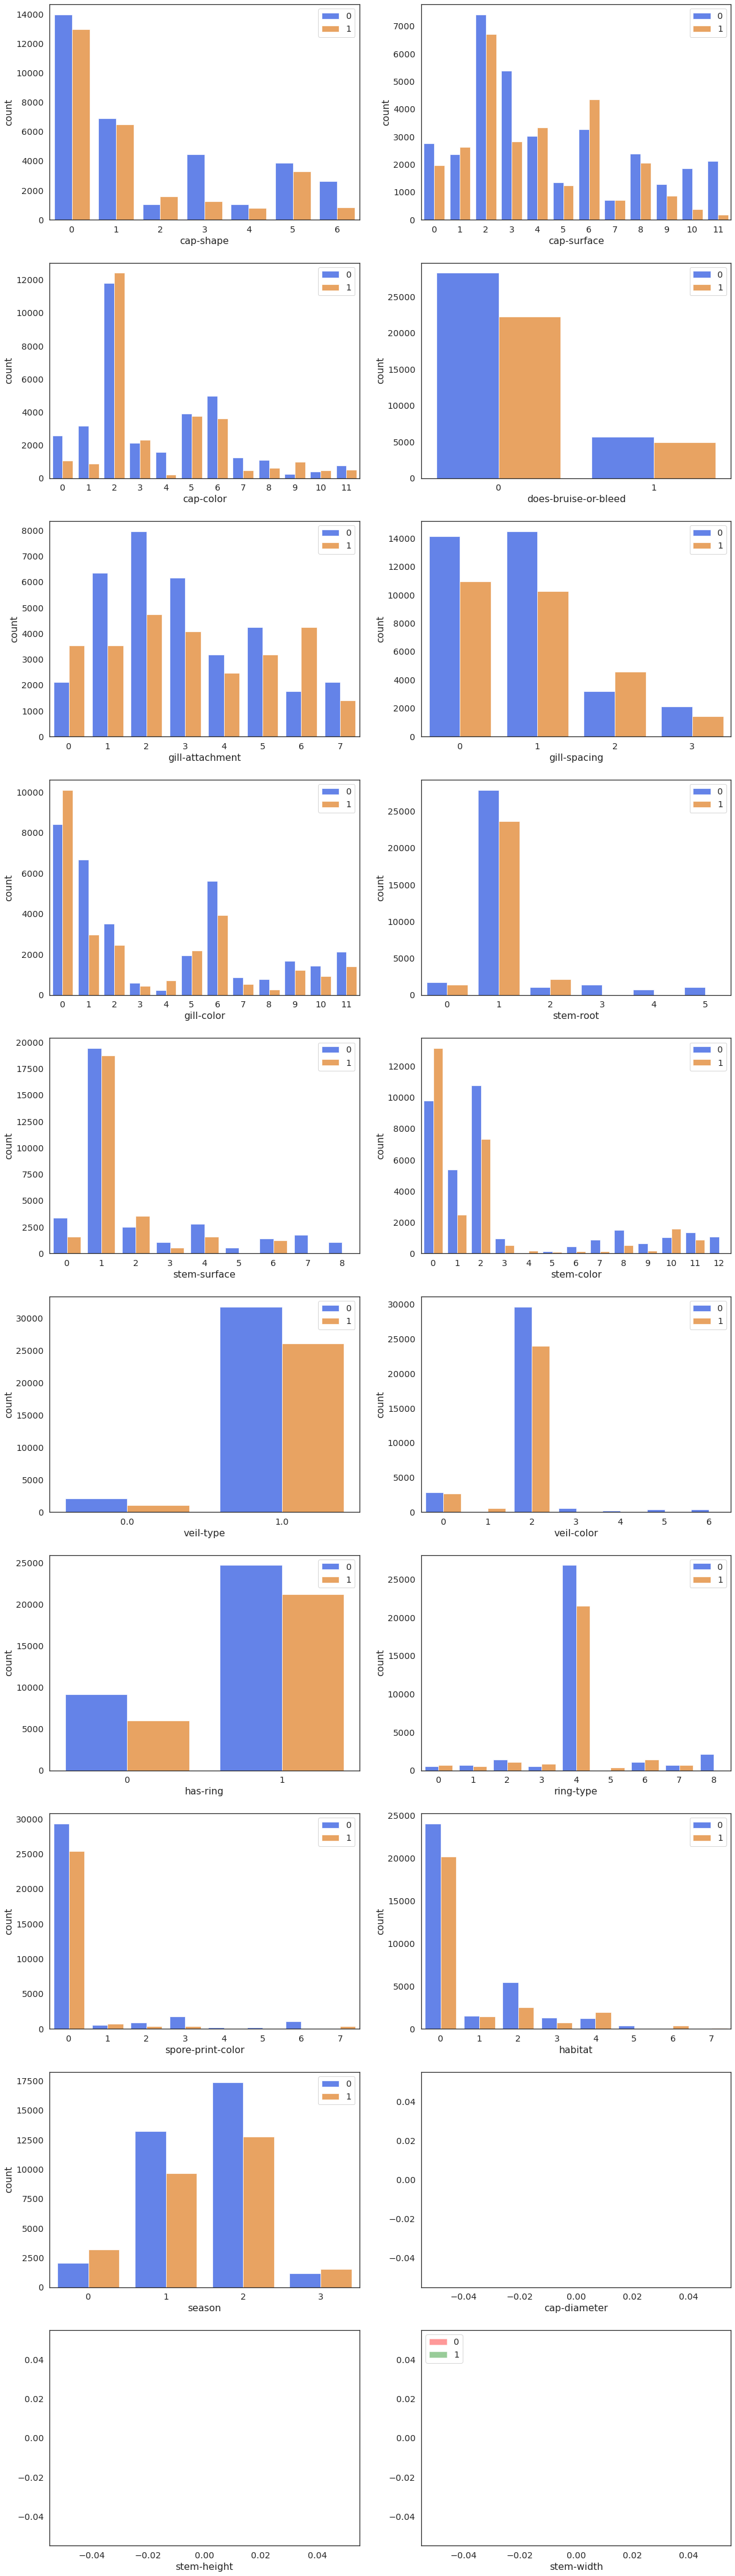

In [ ]:
fig = plt.figure(figsize=(20, 100))
i = 1
for col in categ:
    if col != 'class' and col != 'cap-diameter' and col != 'stem-height' and col != 'stem-width'  :
        fig.add_subplot(13,2,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7)
        plt.legend(loc=1) 
        i += 1

# Box plot survived x age
fig.add_subplot(13,2,18)
#sns.swarmplot(x="Survived", y="Age", hue="Sex", alpha=.7, data=df)
sns.distplot(df[df['class']=='p']['cap-diameter'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='0', color='red')
sns.distplot(df[df['class']=='e']['cap-diameter'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='1', color='green')
fig.add_subplot(13,2,19)
sns.distplot(df[df['class']=='p']['stem-height'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='0', color='red')
sns.distplot(df[df['class']=='e']['stem-height'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='1', color='green')
fig.add_subplot(13,2,20)
sns.distplot(df[df['class']=='p']['stem-width'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='0', color='red')
sns.distplot(df[df['class']=='e']['stem-width'].dropna(), bins = 20, kde_kws={"lw": 2}, 
                 hist_kws={"alpha": .4}, label='1', color='green')

plt.legend()
plt.show()

In [ ]:
a = df.columns[df.isna().any()].tolist()
for i in a :
    print( i  ,'-> null : {0:d} '.format(sum(pd.isnull(df[i]))))
    print(i , '-> ratio: {0:5.3f}'.format(sum(pd.isnull(df[i]))/df.shape[0]))
    print('')

In [ ]:
#df['stem-root'] = df['stem-root'].fillna(df['stem-root']=="unknown")

In [ ]:
print('Number of edible mushrooms: {0:d}'.format(df[df['class']=='e'].shape[0]))
print('Number of poisonous mushrooms : {0:d}'.format(df[df['class']=='p'].shape[0]))
print('Fraction of edible mushrooms: {0:3.2f}'.format(df[df['class']=='e'].shape[0]/df.shape[0]))

Number of edible mushrooms: 0
Number of poisonous mushrooms : 0
Fraction of edible mushrooms: 0.00


In [ ]:
#categ2 =  ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing','gill-color','stem-root','stem-surface','stem-color','veil-type','veil-color','has-ring','ring-type','spore-print-color','habitat','season']
#df = pd.get_dummies(df,drop_first=True,columns=categ2)
# x = df.drop(['class'],axis=1)
#print(x.head())

#scaler = StandardScaler()
#scaler = scaler.fit(x)
#X_s = pd.DataFrame(scaler.transform(x), columns=x.columns)

#print(X_s)

NameError: ignored

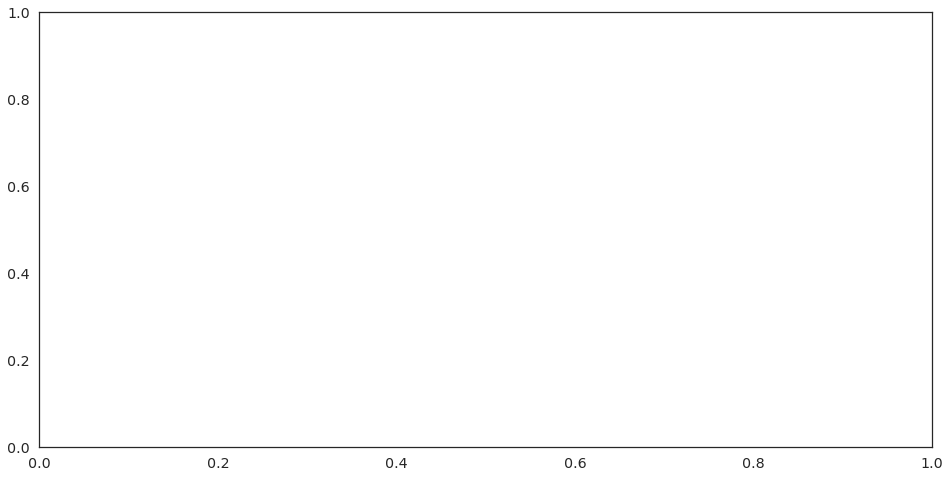

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
ax.scatter(df[df['class']=='p']['stem-width'], df[df['class']=='p']['stem-height'], s=40, c=colors[0])
ax.scatter(df[df['class']=='e']['stem-width'], df[df['class']=='e']['stem-height'], s=40,c=colors[1])
plt.xlabel('$stem-width$', fontsize=12)
plt.ylabel('$stem-height$', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title('Dataset', fontsize=12)
plt.show()

### 1.5 Valutazione funghi velenosi

### 1.6 Valutazione features

#### 1.6.1 Cap-diameter

## 2 Manipolazione dati

## 2.1 